## 第5章 pandas の使い方（変数表）

http://pandas.pydata.org/

### 5.1 データの作成

In [1]:
import numpy as np, pandas as pd
df = pd.DataFrame(np.arange(2, 14, 2).reshape(2, 3),
    columns=['A', 'B', 'C'])
df

,A,B,C
0,2,4,6
1,8,10,12


In [2]:
pd.DataFrame({'A': [2, 8],
              'B': [4, 10],
              'C': [6, 12]})

,A,B,C
0,2,4,6
1,8,10,12


In [3]:
import numpy as np
np.arange(2, 14, 2)

array([ 2,  4,  6,  8, 10, 12])

In [4]:
pd.Series([1, 2, 3], dtype=float)

0    1.0
1    2.0
2    3.0
dtype: float64

In [5]:
df['Var'] = None
df

,A,B,C,Var
0,2,4,6,None
1,8,10,12,None


### 5.3 ブロードキャスト

In [6]:
df = pd.DataFrame(np.arange(2, 8).reshape(2, 3))
df // 2  # 2で割った商

,0,1,2
0,1,1,2
1,2,3,3


In [7]:
df + [2, 1, 0]

,0,1,2
0,4,4,4
1,7,7,7


In [8]:
(df.T + [3, 0]).T

,0,1,2
0,5,6,7
1,5,6,7


### 5.4 条件抽出

In [9]:
df = pd.DataFrame(np.arange(8).reshape(4, 2),
                 columns=['A', 'B'])
i, j = 2, 5
df[(df.A==i) | (df.B==j)]

,A,B
1,2,3
2,4,5


In [10]:
df.query('A==@i or B==@j')

,A,B
1,2,3
2,4,5


### 5.5 ユニバーサル関数

In [11]:
df = pd.DataFrame(np.arange(2, 8).reshape(2, 3))
df < 5

,0,1,2
0,True,True,True
1,False,False,False


In [12]:
np.less(df, 5)

,0,1,2
0,True,True,True
1,False,False,False


In [13]:
df.apply(lambda v: v < 5)

,0,1,2
0,True,True,True
1,False,False,False


### 5.6 軸で演算する関数

In [14]:
df = pd.DataFrame(np.arange(2, 8).reshape(2, 3))
df.max()

0    5
1    6
2    7
dtype: int64

In [15]:
df.max(axis=1)

0    4
1    7
dtype: int64

In [16]:
print(df.values.argmax())  # 5
print(df.values.argmax(0))  # [1 1 1]
print(df.values.argmax(1))  # [2 2]

5
[1 1 1]
[2 2]


### 5.7 その他の関数

In [17]:
df = pd.DataFrame([[1, 3], [1, 5], [2, 7]],
                  columns=['A', 'B'])
df  # 元の表

,A,B
0,1,3
1,1,5
2,2,7


In [18]:
for key, group in df.groupby('A'):
    print(f'{key}:\n{group}\n')

1:
   A  B
0  1  3
1  1  5

2:
   A  B
2  2  7



In [19]:
df.groupby('A').first()

,B
A,
1,3
2,7


In [20]:
df.groupby('A').mean()

,B
A,
1,4
2,7


In [21]:
df = pd.DataFrame({'I': [1, 1, 2, 2, 3, 3],
                   'J': [2, 3, 1, 3, 1, 2],
                   'Var': 'U V W X Y Z'.split()})
df

,I,J,Var
0,1,2,U
1,1,3,V
2,2,1,W
3,2,3,X
4,3,1,Y
5,3,2,Z


In [22]:
pd.merge(df, pd.DataFrame(
    {'I': df.J, 'J': df.I, 'Other': df.Var}))

,I,J,Var,Other
0,1,2,U,W
1,1,3,V,Y
2,2,1,W,U
3,2,3,X,Z
4,3,1,Y,V
5,3,2,Z,X


In [23]:
df = pd.DataFrame(np.arange(2, 8).reshape(2, 3))
for row in df.itertuples():
    print(row)

Pandas(Index=0, _1=2, _2=3, _3=4)
Pandas(Index=1, _1=5, _2=6, _3=7)


In [24]:
df = pd.DataFrame([['Alice', 'F'], ['Bob', 'M'],
    ['Dave', 'M']], columns=['Name', 'Type'])
df

,Name,Type
0,Alice,F
1,Bob,M
2,Dave,M


In [25]:
pd.get_dummies(df, columns=['Type'])

,Name,Type_F,Type_M
0,Alice,1,0
1,Bob,0,1
2,Dave,0,1


In [26]:
df = pd.DataFrame({
    '時限': [1, 1, 1, 2, 2, 2],
    '曜日': '月 火 水 月 火 水'.split(),
    '科目': '国 算 社 理 音 体'.split(),
})
df.pivot('時限', '曜日')

科目      
曜日  月  水  火
時限         
1   国  社  算
2   理  体  音

### 5.8 グラフ描画について

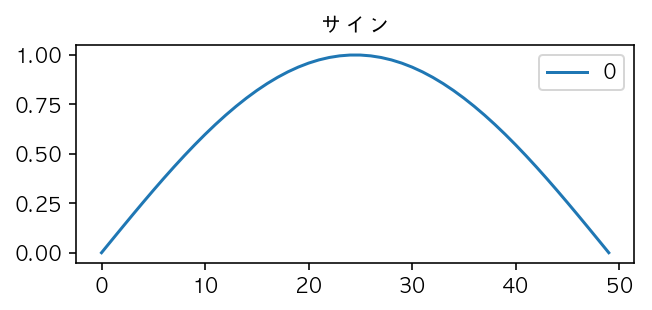

In [27]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 5, 2
plt.rcParams['font.family'] = 'AppleGothic'
df = pd.DataFrame(np.sin(np.linspace(0, np.pi)))
df.plot(title='サイン');

In [28]:
import matplotlib
matplotlib.font_manager.findSystemFonts()

['/Library/Fonts/Arial Unicode.ttf',
 '/Library/Fonts/PlantagenetCherokee.ttf',
 '/System/Library/Fonts/SFNSText-BoldG2.otf',
 '/Library/Fonts/Microsoft/Constantia Bold Italic.ttf',
 '/Library/Fonts/Chalkduster.ttf',
 '/Library/Fonts/Microsoft/Arial.ttf',
 '/Library/Fonts/Arial Bold Italic.ttf',
 '/Library/Fonts/Microsoft/Arial Italic.ttf',
 '/usr/X11/lib/X11/fonts/TTF/GohaTibebZemen.ttf',
 '/Library/Fonts/Microsoft/Times New Roman Italic.ttf',
 '/Library/Fonts/Georgia Bold Italic.ttf',
 '/Library/Fonts/Arial Narrow Bold Italic.ttf',
 '/usr/X11/lib/X11/fonts/TTF/luxisr.ttf',
 '/usr/X11/lib/X11/fonts/TTF/luxirbi.ttf',
 '/Library/Fonts/Microsoft/Wingdings.ttf',
 '/Library/Fonts/YuppySC-Regular.otf',
 '/Library/Fonts/STIXVarBol.otf',
 '/System/Library/Fonts/SFNSText-SemiboldItalic.otf',
 '/usr/local/share/fonts/migu-1m-bold.ttf',
 '/Library/Fonts/Georgia Italic.ttf',
 '/System/Library/Fonts/SFNSText-RegularItalicG2.otf',
 '/usr/X11R6/lib/X11/fonts/TTF/GohaTibebZemen.ttf',
 '/Library/Fonts

In [29]:
# フォントキャッシュを更新
# matplotlib.font_manager._rebuild()

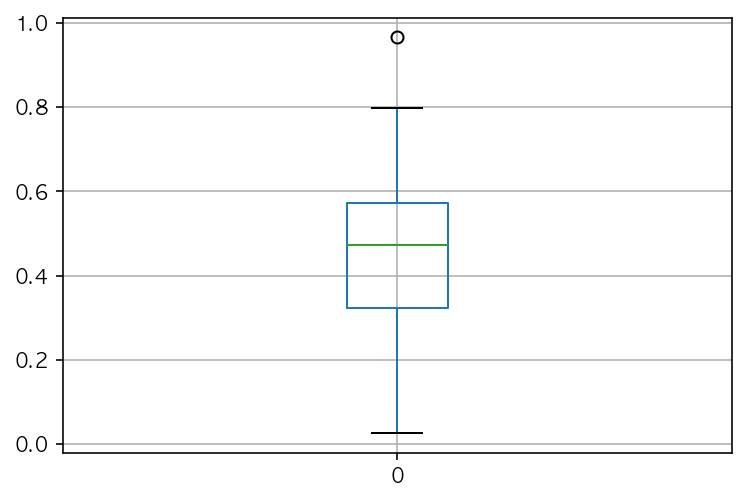

In [30]:
np.random.seed(2)
pd.DataFrame(np.random.exponential(1, 10)).boxplot();

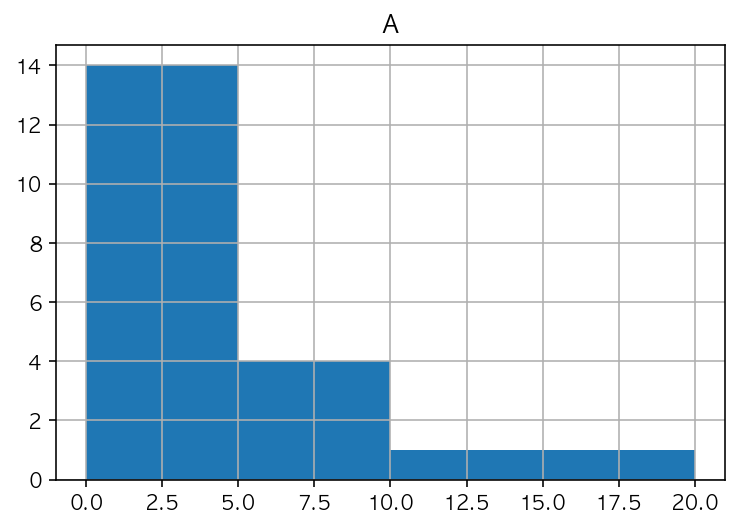

In [31]:
np.random.seed(1)
df = pd.DataFrame(np.random.exponential(8, 20), columns=['A'])
df.hist(range=(0, 20), bins=4);

In [32]:
pd.value_counts(pd.cut(df.A, range(0, 25, 5)))

(0, 5]      14
(5, 10]      4
(15, 20]     1
(10, 15]     1
Name: A, dtype: int64